In [47]:
# Import the packages that we will be using
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
# Define where you are running the code: colab or local
RunInColab = False # (False: no | True: yes)
# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')
    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"
    # Define path del proyecto
    Ruta = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"
else:
    # Define path del proyecto
    Ruta = "C:/Users/GeekD/OneDrive/Documents/GitHub/TC1002S/NotebooksProfessor"
    URL = Ruta + "/datasets/SyntheticData4Clustering_X.csv"

In [19]:
df = pd.read_csv(URL)

## Understanding and preprocessing the data

In [12]:
#Print dataframe
df

,x1,x2,x3,x4,x5,x6
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681,5.712978
1,1.356415,9.767893,7.263659,8.750819,5.568930,-6.039122
2,1.185186,11.528344,9.999419,7.890027,7.308210,-8.899397
3,-1.739155,12.648965,7.965588,7.850296,10.235743,-10.175542
4,7.890985,-3.210880,-7.672016,2.438106,3.310904,-3.308334
...,...,...,...,...,...,...
1019,3.685106,-1.715503,-5.674443,6.510551,-0.121862,-6.166649
1020,-7.014173,-9.697874,4.093272,-0.590262,-9.882245,2.339336
1021,-2.993762,7.528182,7.877165,8.895835,9.318544,-7.445100
1022,4.576644,-1.720788,-6.581909,4.745839,1.497980,-4.828975


In [18]:
#Number of observations and variables

print("Registros: "+str(df.shape[0])+"\t\tVariables: "+str(df.shape[1]))

Registros: 1024		Variables: 6


In [23]:
#Drop NaN
df.dropna()
df

,x1,x2,x3,x4,x5,x6
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681,5.712978
1,1.356415,9.767893,7.263659,8.750819,5.568930,-6.039122
2,1.185186,11.528344,9.999419,7.890027,7.308210,-8.899397
3,-1.739155,12.648965,7.965588,7.850296,10.235743,-10.175542
4,7.890985,-3.210880,-7.672016,2.438106,3.310904,-3.308334
...,...,...,...,...,...,...
1019,3.685106,-1.715503,-5.674443,6.510551,-0.121862,-6.166649
1020,-7.014173,-9.697874,4.093272,-0.590262,-9.882245,2.339336
1021,-2.993762,7.528182,7.877165,8.895835,9.318544,-7.445100
1022,4.576644,-1.720788,-6.581909,4.745839,1.497980,-4.828975


In [24]:
print("Registros: "+str(df.shape[0])+"\t\tVariables: "+str(df.shape[1]))

Registros: 1024		Variables: 6


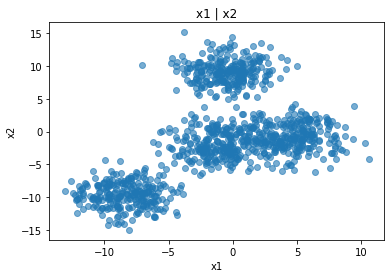

In [38]:
#Scatter x1 & x2

plt.scatter(df.x1, df.x2, alpha = .6)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("x1 | x2")
plt.show()

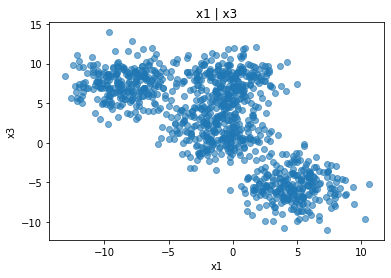

In [39]:
#Scatter x1 & x2

plt.scatter(df.x1, df.x3, alpha = .6)
plt.xlabel("x1")
plt.ylabel("x3")
plt.title("x1 | x3")
plt.show()

In [151]:
#Pairplot
sns.pairplot(df, corner = True, diag_kind = "kde")
plt.show()

TypeError: pairplot() got an unexpected keyword argument 'alpha'

## Clustering

In [179]:
#Define n clusters
K = 4
km = KMeans(n_clusters = K, n_init="auto")

#Clustering
yestimated = km.fit_predict(df)

C:\Users\GeekD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [180]:
yestimated

array([3, 2, 2, ..., 2, 0, 0])

In [181]:
df.insert(6, "Clusters", yestimated, True)
#df.drop("Clusters", axis=1, inplace = True)

In [182]:
df.Clusters.unique()

array([3, 2, 0, 1])

In [175]:
#Cluster centroid
kmc = km.cluster_centers_
kmc

array([[-0.44229417,  9.13121533,  7.61409814,  7.22984721,  8.13001382,
        -7.6264221 ],
       [-8.3650671 , -9.59550917,  7.40711607,  3.77249056, -9.44226128,
         2.67666451],
       [ 1.85043266, -1.34592151, -2.11883656,  4.5718429 , -0.79519547,
        -0.55114018]])

In [201]:
#Sum of SSE
km.inertia_

24421.758911237903

In [185]:
#Iterations required
km.n_iter_

3

## Plot estimated clusters

In [186]:
#Dataframe
df1 = df[df.Clusters==0]
df2 = df[df.Clusters==1]
df3 = df[df.Clusters==2]
df4 = df[df.Clusters==3]

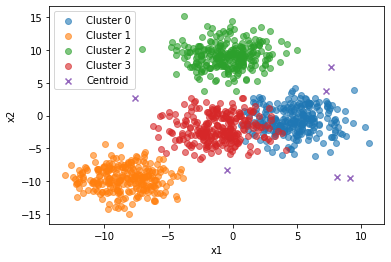

In [196]:
#Scatter clusters
#plt.figure(figsize=(15,15))

plt.scatter(df1.x1, df1.x2, label="Cluster 0", alpha = .6)
plt.scatter(df2.x1, df2.x2, label="Cluster 1", alpha = .6)
plt.scatter(df3.x1, df3.x2, label="Cluster 2", alpha = .6)
plt.scatter(df4.x1, df4.x2, label="Cluster 3", alpha = .6)
plt.scatter(kmc[0],kmc[1], label="Centroid", marker = "x")
plt.xlabel("x1")
plt.ylabel("x2")

plt.legend()
plt.show()

## Selecting K: Elbow plot

In [234]:
#Init list of sse
SSE = []
#Define K
K = [1,2,3,4,5,6,7,8,9,10]
#For each K
for x in K:
    tempkm = KMeans(n_clusters = x, n_init="auto")
    tempkm.fit_predict(df[["x1","x2"]]) 
    SSE.append(tempkm.inertia_)
SSE

C:\Users\GeekD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\GeekD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\GeekD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\GeekD\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

[75961.08596143551,
 31449.60502545175,
 12282.820576807848,
 7510.699368236751,
 6852.301617761244,
 6080.172364073438,
 5429.665095565534,
 4654.278027921858,
 4285.592853104688,
 3982.7953219170286]

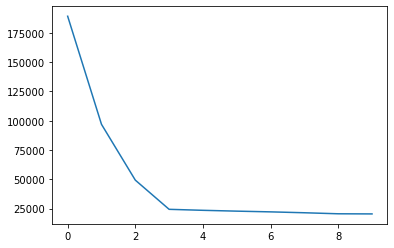

In [231]:
# Plot sse vs K
plt.plot(range(0,10),SSE)
plt.show() 

# Activity: work with the iris dataset

    
1. Do clustering with the iris flower dataset to form clusters using as features the four features

2. Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features

3. Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features

4. Which one provides the better grouping? Solve this using programming skills, e.g., compute performance metrics
